### First of all , importing important labraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# No of unique items in each column
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [5]:
#Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### EDA

In [6]:
#changing plt sytle
plt.style.use('seaborn-v0_8')

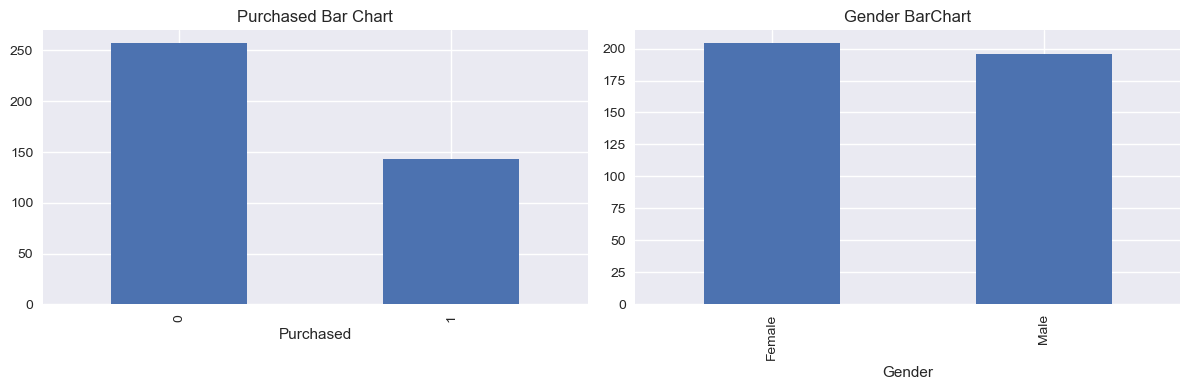

In [7]:
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2,figsize = (12,4))
df['Purchased'].value_counts().plot(kind = 'bar', ax =ax1)
ax1.set_title('Purchased Bar Chart')
df['Gender'].value_counts().plot(kind = 'bar', ax = ax2)
ax2.set_title('Gender BarChart')
plt.tight_layout()
plt.show()

<Axes: xlabel='Purchased', ylabel='count'>

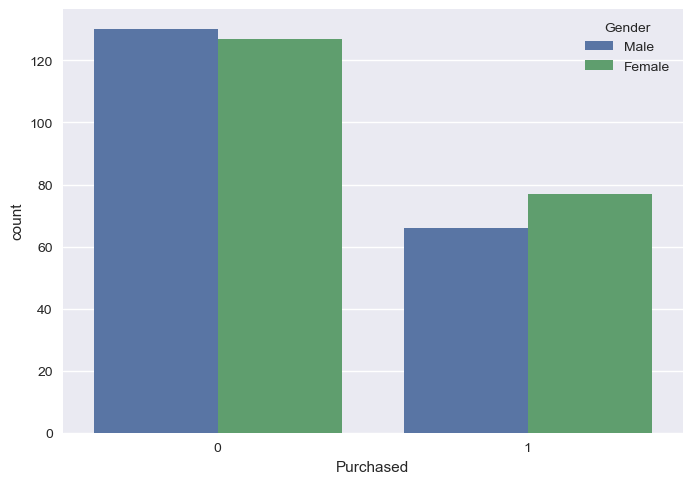

In [8]:
#Comparing Purchasing power of both male and femail

sns.countplot(data = df,x = 'Purchased', hue = 'Gender')

C:\Users\Adetona Precious I\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


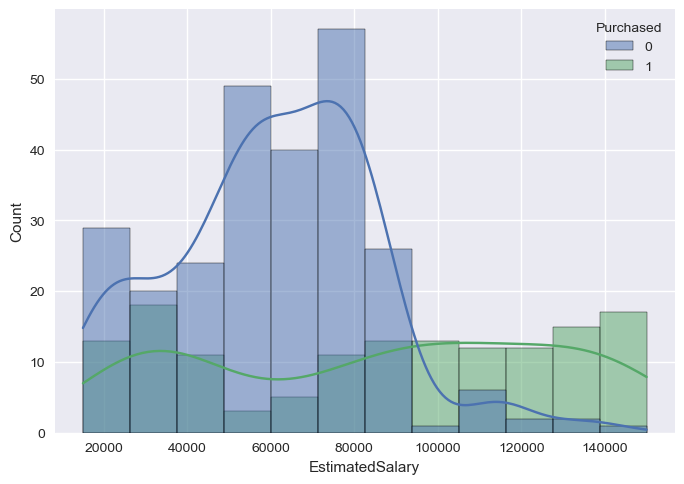

In [9]:
# Histogram of purchasing power vs EstimatedSalary

sns.histplot(data =df, x = "EstimatedSalary", hue = 'Purchased', kde = True)
plt.show()

C:\Users\Adetona Precious I\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


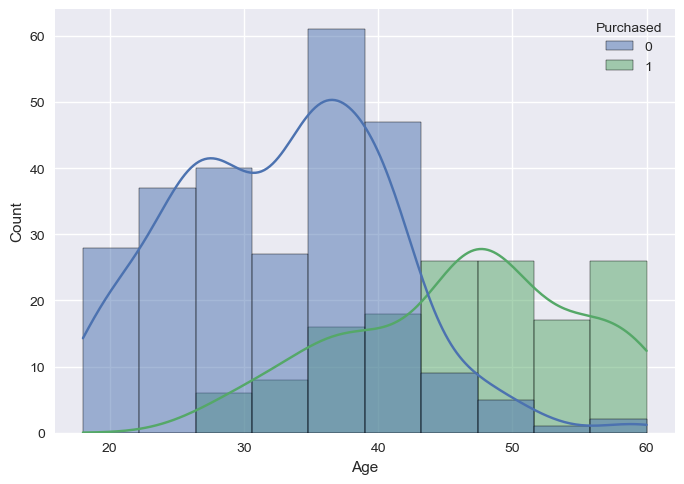

In [10]:
# Histogram of purchasing power vs Age

sns.histplot(data =df, x = "Age", hue = 'Purchased', kde = True)
plt.show()

<Axes: xlabel='Purchased', ylabel='Age'>

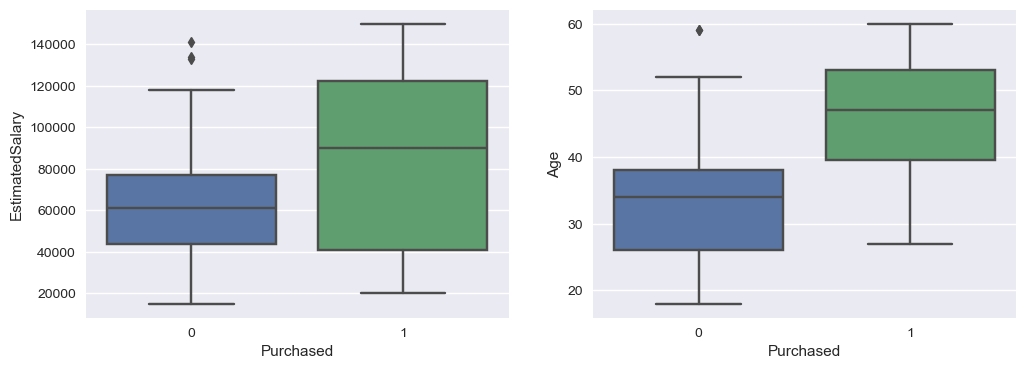

In [11]:
#Comparism the purchasing power with respect to Estimated Salary and Age Respectively
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2,figsize = (12,4))
sns.boxplot(data = df,x = 'Purchased', y = 'EstimatedSalary', ax =ax1)
sns.boxplot(data = df,x = 'Purchased', y = 'Age', ax =ax2)

<Axes: xlabel='Purchased', ylabel='Age'>

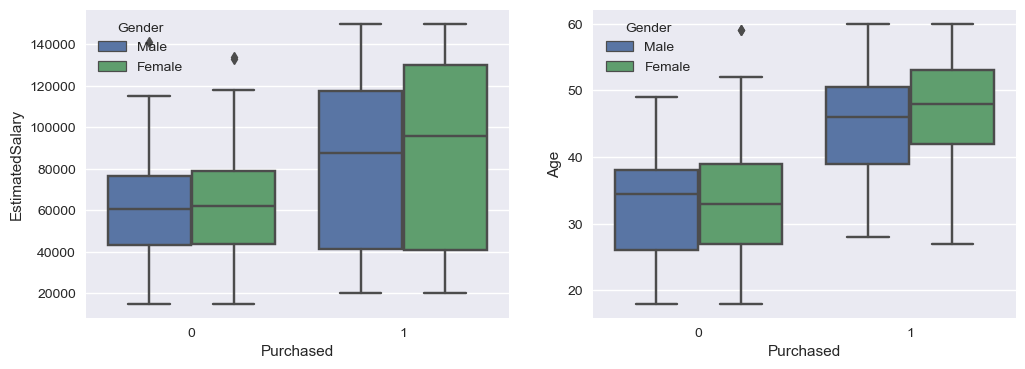

In [12]:
#Comparism the purchasing power of each gender with respect to Estimated Salary and Age Respectively
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2,figsize = (12,4))
sns.boxplot(data = df,x = 'Purchased', y = 'EstimatedSalary', hue = 'Gender' ,ax =ax1)
sns.boxplot(data = df,x = 'Purchased', y = 'Age', hue= 'Gender', ax =ax2)

### Correlation between different features

                  User ID       Age  EstimatedSalary  Purchased
User ID          1.000000 -0.000721         0.071097   0.007120
Age             -0.000721  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.155238         1.000000   0.362083
Purchased        0.007120  0.622454         0.362083   1.000000


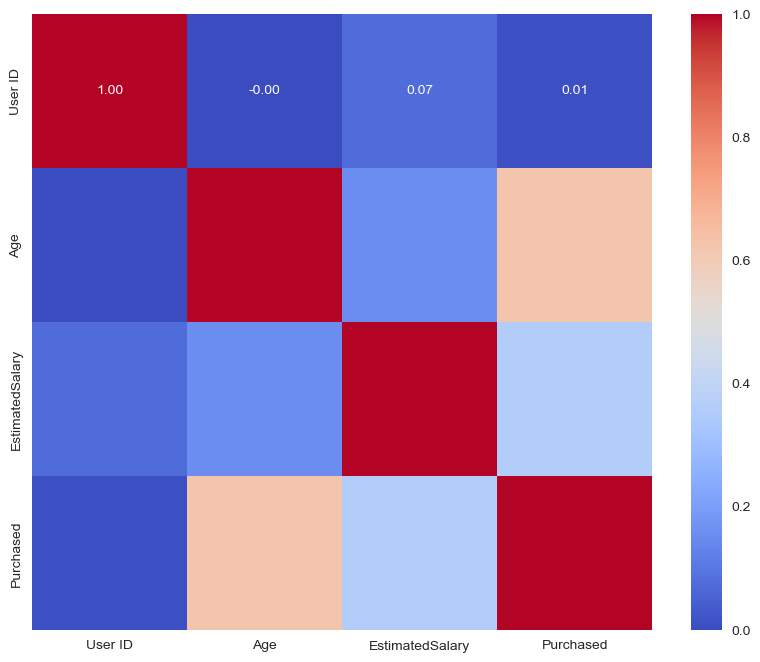

In [13]:
corr = df.select_dtypes(['int','float']).corr()
print(corr)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Building the model

In [14]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib


In [20]:
# Categorical variable
cat_data = df.select_dtypes(include=['object']).columns

transformer = ColumnTransformer(transformers=[
    ('categories', OneHotEncoder(), cat_data)
], remainder='passthrough')

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('XGBoost Classifier', XGBClassifier())
]

best_model_name = ""
best_model_accuracy = 0

for name, model in models:
    pipeline = Pipeline([
        ('preprocessor', transformer),
        ('classifier', model)
    ])
    
    X = df.drop(columns='Purchased')
    y = df['Purchased']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model_name = name
        best_model = pipeline
        
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*50)

joblib.dump(best_model, 'best_model.pkl')
print(f"The best model ({best_model_name}) has been saved.")


Model: Logistic Regression
Accuracy: 0.7200
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        57
           1       1.00      0.35      0.52        43

    accuracy                           0.72       100
   macro avg       0.84      0.67      0.66       100
weighted avg       0.81      0.72      0.68       100

Model: Decision Tree Classifier
Accuracy: 0.8800
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        57
           1       0.94      0.77      0.85        43

    accuracy                           0.88       100
   macro avg       0.89      0.87      0.87       100
weighted avg       0.89      0.88      0.88       100

Model: Random Forest Classifier
Accuracy: 0.9500
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        57
           1       0.95      0.93      0.94        43

    accuracy                           0

#### From the result show above while comparing different types of classification algorithms , it can be seen that the RandomForest Classifier performend the best out of all the algorithm used